# Translocation simulation code

## Exploring patient data 
- Finding where each clone was found within each ward

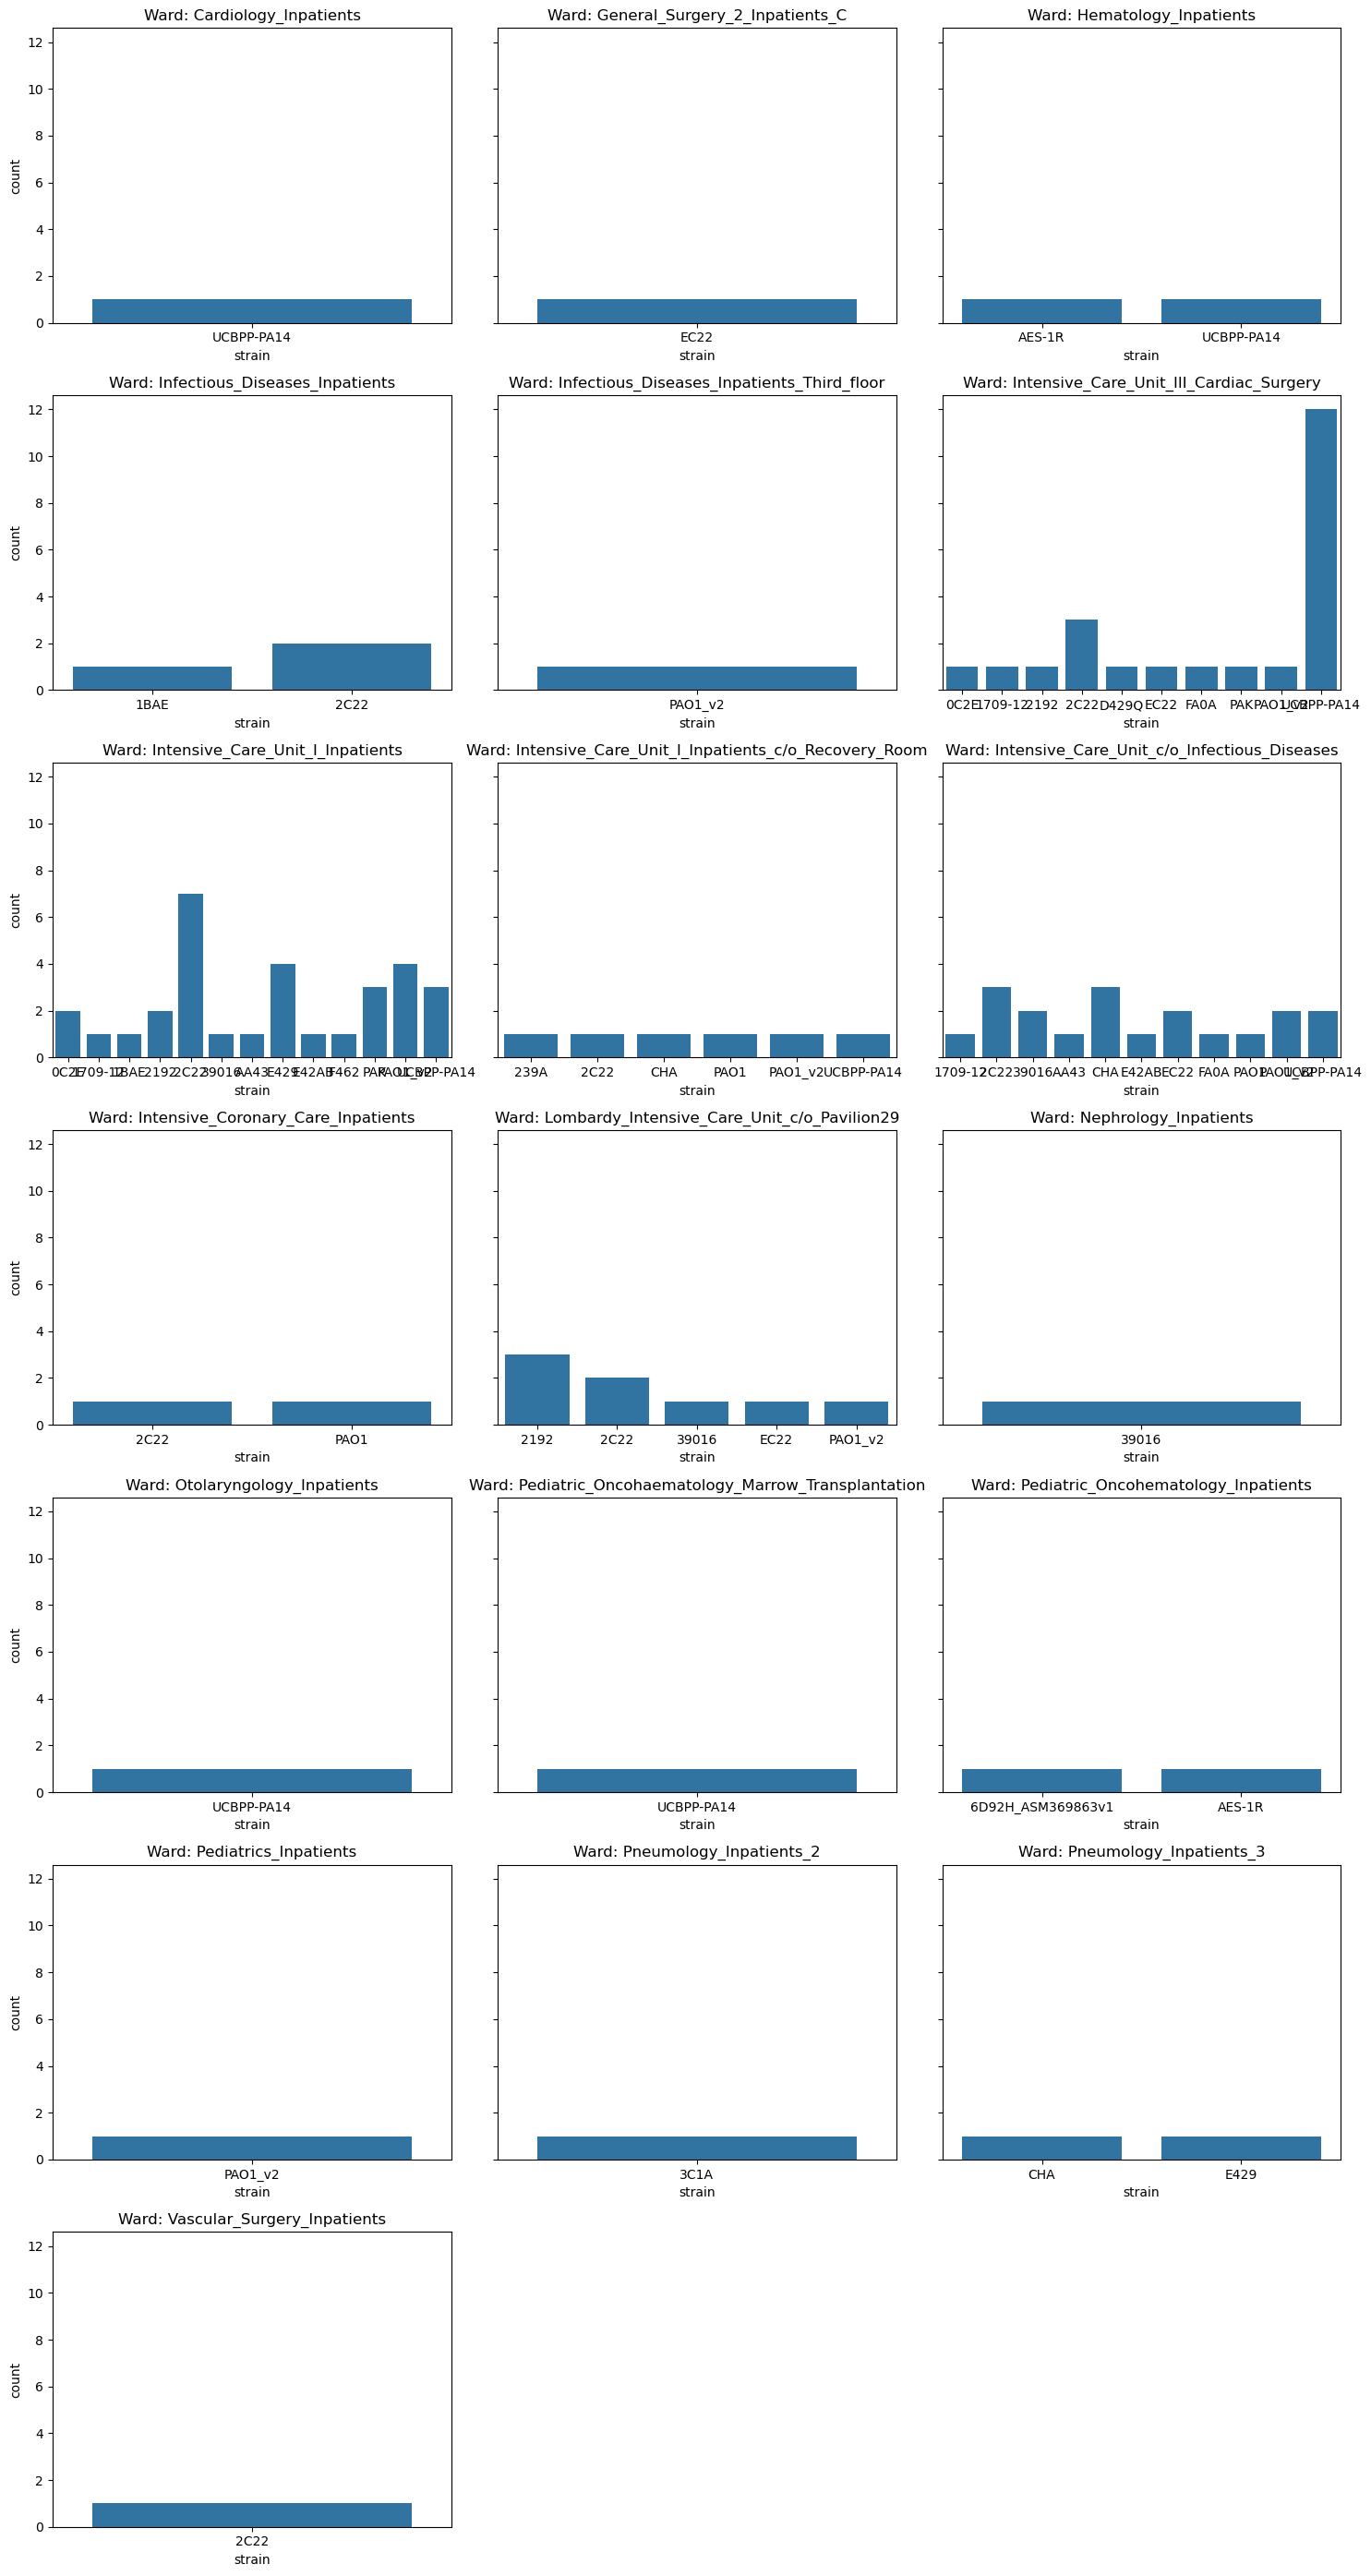

<Figure size 640x480 with 0 Axes>

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

ward_metadata = '../data/fig2_translocation_simulations/clu_out_summaries_metadata.tsv'
sample_list = '../data/Extended_Data_Table1_cocov_study_data.tsv'
patient_ward_data = pd.read_csv(ward_metadata, sep='\t', header=0)
sample_list_df = pd.read_csv(sample_list, sep='\t', header=0)

# subset dataframe for psa positive patient only
sample_lane = sample_list_df['lane'].tolist()
refine_patient_ward_data = patient_ward_data[patient_ward_data['sample'].isin(sample_lane)]

sample_ward_dict = dict(zip(refine_patient_ward_data['sample'], refine_patient_ward_data['HOSPITAL_WARD']))
sample_ward_type_dict = dict(zip(refine_patient_ward_data['sample'], refine_patient_ward_data['ward_type']))
sample_outcome_dict = dict(zip(refine_patient_ward_data['sample'], refine_patient_ward_data['OUTCOME']))

sample_list_df['ward'] = sample_list_df['lane'].map(sample_ward_dict)
# sample_list_df['ward_type'] = sample_list_df['lane'].map(sample_ward_type_dict)
# sample_list_df['outcome'] = sample_list_df['lane'].map(sample_outcome_dict)

unique_patient_df = sample_list_df[['strain', 'patient', 'ward']].drop_duplicates()

# The number of each clone found per patient in each ward
patients_ward_clones = unique_patient_df.groupby(['ward', 'strain']).size()
patients_ward_clones.columns = ['ward', 'strain', 'count']
patients_ward_clones_df = patients_ward_clones.reset_index(name='count')

# Get unique wards
patients_ward_clones_df['strain'] = [x.replace('_RAxML', '').replace('Pseudomonas_aeruginosa_', '') for x in patients_ward_clones_df['strain']]
unique_wards = patients_ward_clones_df['ward'].unique()

n_col = 3
n_rows = (len(unique_wards) + n_col - 1) // n_col # Create a figure for multiple subplots

fig, axes = plt.subplots(n_rows,n_col, figsize=(15, 4 * n_rows), sharey=True)
axes = axes.flatten()

# Iterate over each unique ward to plot only relevant data
for i, ward in enumerate(unique_wards):
    # Filter data for this ward
    ward_data = patients_ward_clones_df[patients_ward_clones_df['ward'] == ward]
    
    # Plot for this specific ward
    sns.barplot(x='strain', y='count', data=ward_data, ax=axes[i])
    
    # Set the title for each subplot
    axes[i].set_title(f'Ward: {ward}')
    # axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

for j in range(len(unique_wards), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
plt.savefig("../test/clones_on_wards.png")




## Performing translocation simulations

/tmp/ipykernel_2579649/2354827164.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_51.sort_values(by=['date'], inplace=True, ascending=True)
/tmp/ipykernel_2579649/2354827164.py:259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_15.sort_values(by=['date'], inplace=True, ascending=True)
/tmp/ipykernel_2579649/2354827164.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_138.sort_values(by=['date'], inplace=True, ascending=

Total Patients: 16
Multi bodysite patients (mbs): 10
Total multi body sites with same clone (mbssc): 9
Baseline: 90.0
70.0
Z: 2.4806946917841692 P = 0.0065563316325779495 base % = 90.0


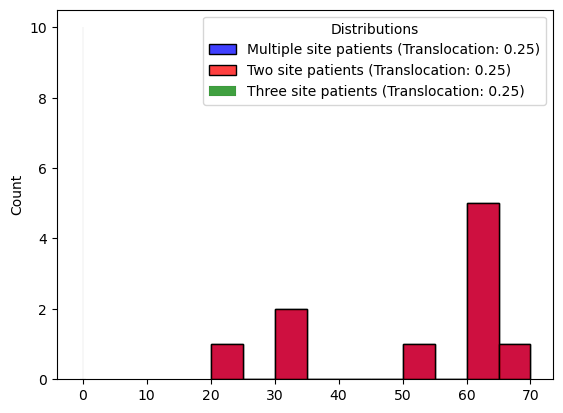

Total Patients: 22
Multi bodysite patients (mbs): 10
Total multi body sites with same clone (mbssc): 8
Baseline: 80.0
Z: 2.4227185592617446 P = 0.007702428046812838 base % = 80.0


/tmp/ipykernel_2579649/2354827164.py:149: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('patient').apply(assign_strain_to_group, random_patients=random_patients, tl_rate=tl_rate).reset_index(drop=True)
/tmp/ipykernel_2579649/2354827164.py:149: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('patient').apply(assign_strain_to_group, random_patients=random_patients, tl_rate=tl_rat

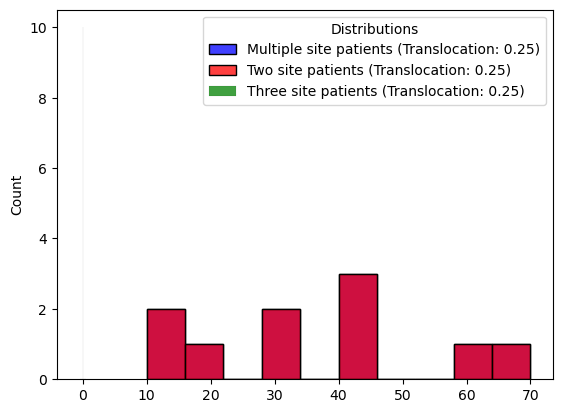

Total Patients: 16
Multi bodysite patients (mbs): 5
Total multi body sites with same clone (mbssc): 4
Baseline: 80.0
Z: 1.7460757394239454 P = 0.040398895910456964 base % = 80.0


/tmp/ipykernel_2579649/2354827164.py:149: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('patient').apply(assign_strain_to_group, random_patients=random_patients, tl_rate=tl_rate).reset_index(drop=True)
/tmp/ipykernel_2579649/2354827164.py:149: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('patient').apply(assign_strain_to_group, random_patients=random_patients, tl_rate=tl_rat

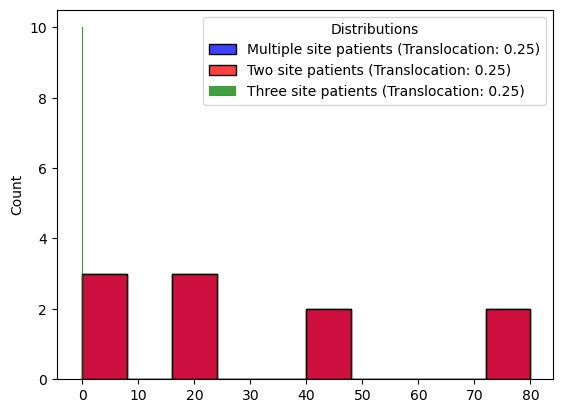

Total Patients: 53
Multi bodysite patients (mbs): 24
Total multi body sites with same clone (mbssc): 20
Baseline: 83.3
Z: 8.357464096534262 P = 1.0 base % = 83.3


/tmp/ipykernel_2579649/2354827164.py:149: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('patient').apply(assign_strain_to_group, random_patients=random_patients, tl_rate=tl_rate).reset_index(drop=True)
/tmp/ipykernel_2579649/2354827164.py:149: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('patient').apply(assign_strain_to_group, random_patients=random_patients, tl_rate=tl_rat

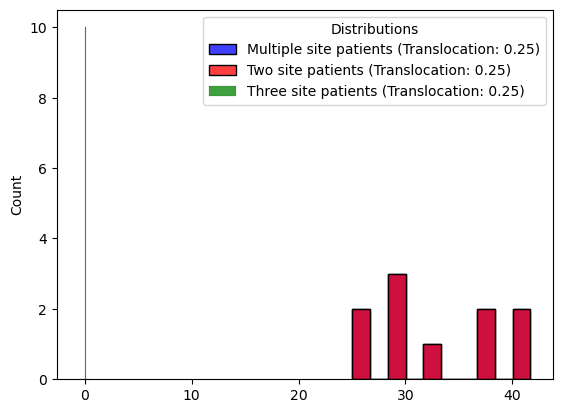

Total Patients: 84
Multi bodysite patients (mbs): 25
Total multi body sites with same clone (mbssc): 21
Baseline: 84.0


/tmp/ipykernel_2579649/2354827164.py:149: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('patient').apply(assign_strain_to_group, random_patients=random_patients, tl_rate=tl_rate).reset_index(drop=True)
/tmp/ipykernel_2579649/2354827164.py:149: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('patient').apply(assign_strain_to_group, random_patients=random_patients, tl_rate=tl_rat

Z: 6.560682372397658 P = 2.6781051268182598e-11 base % = 84.0


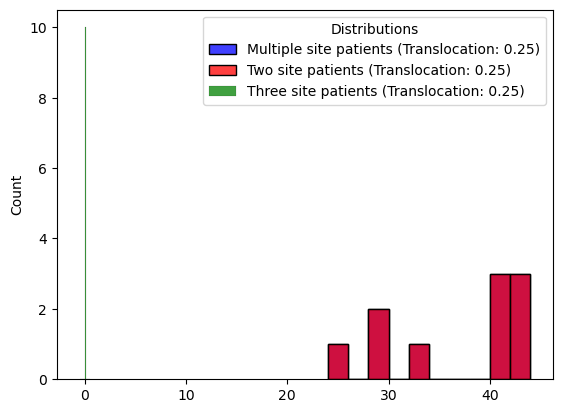

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats 
import math 
import random
import os



def calculate_inferential_stats(X):
    '''
    Description: Calculate the mean, standard deviation from a list
    param X: A random variable (vector/list)
    '''
    x_mean = np.mean(X)
    x_stdev = np.std(X)
    return (x_mean, x_stdev)

def calculate_z_score(x, mu, sigma):
    '''
    param x: The value of a random variable
    param mu: The mean of the random distribution
    param sigma: The standard deviation of the normal ditribution
    returns z: The standard score/z-score 
    '''
    z = (x-mu)/sigma
    return z

def calculate_pooled_stdev(stdev_1, stdev_2):
    '''
    description: Used in Cohen D equation to understand sample effect size e.g. for t-test etc
    param stdev_1: The standard deviation of group_1 
    param stdev_2: The standard deviation of group_2
    return: pooled standard deviation
    '''
    pooled_stdev = math.sqrt((  (stdev_1**2)  +  (stdev_2**2))  /  2)
    return pooled_stdev

def calculate_cohen_d(mean_1, mean_2, pooled_stdev):
    '''
    description: Indicates the sample effect size for equal sized groups.
    loose interpretation: 0.2 = small effect, 0.5 = medium effect, 0.8 = large effect
    param mean_1: The mean of group 1
    param mean_2: the mean of group 2
    param pooled_stdev: The pooled standard deviations of the mean as per Pool's 1988 method
    return: cohen's d statistic
    '''
    cohens_d = (mean_1 - mean_2) / pooled_stdev
    return cohens_d

def assign_strain_to_group(group, random_patients, tl_rate):
    if not list(set(group['patient'].tolist()))[0] in random_patients:
        pass
    else:
        if len(group) > 1:
            # Randomly select one row for the group
            selected_df = group.sample(1)
            selected_row = selected_df.iloc[0]
            tl_strain = selected_row['translocation_strain']
            tl_sample_type = selected_row['sample_type']
            tl_index = selected_df.index[0]

            random_number = np.random.rand()
            # With tl_rate probability, duplicate the strain from the selected row
            if random_number < tl_rate:
                new_sample = group.sample(1)
                new_sample_index = new_sample.index[0]
                new_sample_row = new_sample.iloc[0]
                new_sample_type = new_sample_row['sample_type']

                while new_sample_index == tl_index and tl_sample_type == new_sample_type:
                    new_sample = group.sample(1)
                    new_sample_index = new_sample.index[0]
                    new_sample_row = new_sample.iloc[0]
                    new_sample_type = new_sample_row['sample_type']
                    
                group.loc[new_sample_index, 'translocation_strain'] = tl_strain

    return group

def compare_three_histograms(multiple_site_per, two_site_per, three_site_per, title_1, title_2, title_3 ,set_kde, set_stat, set_bins):
    sns.histplot(multiple_site_per, bins=set_bins, color='blue', label=title_1, kde=set_kde, stat=set_stat)
    sns.histplot(two_site_per, bins=set_bins, color='red', label=title_2, kde=set_kde, stat=set_stat)
    sns.histplot(three_site_per, bins=set_bins, color='green', label=title_3, kde=set_kde, stat=set_stat)
    plt.legend(title="Distributions")
    plt.show()
    # single_mean = statistics.mean(percentage_single_body_sites)
    # single_sd = statistics.stdev(percentage_single_body_sites)
    # multi_mean = statistics.mean(percentage_multiple_body_sites)
    # multi_sd = statistics.stdev(percentage_multiple_body_sites)

    # return(single_mean, multi_mean, single_sd, multi_sd)
    
def env_acq_tl_sim(n_sim, df, tl_rate, tl_proportion):
    '''
    description: Performs simualtions with a given number of permutations using ward metadata alongside clone data.
    param n_sim: The number of simulations
    param df: Dataframe containing the columns for patient, strain/clone, and sample_type 
    (additional columns mess with the aggregate function in this sim so best to keep this df minimalist)
    param tl_rate: a translocation rate, i.e. a probability that some clone will move to an alternate bodysite
    param tl_proportion: A proportion of patients/clones/total data to use tl_rate
    '''
    # baseline values
    df = df.sort_values(['patient', 'sample_type'], ascending=[True, True])
    multi_body_site_patient_strain_df = df.groupby(['patient', 'strain'])['sample_type'].agg(list).reset_index()
    aggregate_patient_df = df.groupby(['patient'])['sample_type'].agg(set).reset_index()
    aggregate_patient_df['sample_type'] = [sorted(list(x)) for x in aggregate_patient_df['sample_type']]

    # multi_body_site_patients_df is the dataframe with the total number of patients that had any pseudomonas in multiple body sites (total multi body sites) 
    multi_body_site_patients_df = aggregate_patient_df[aggregate_patient_df['sample_type'].apply(lambda x: len(x) > 1)]

    # shared_strains is the dataframe where patients have the same clone in multiple body sites
    shared_strains = multi_body_site_patient_strain_df[multi_body_site_patient_strain_df['sample_type'].apply(lambda x: len(x) > 1)]
    total_patients = len(list(set(multi_body_site_patient_strain_df['patient'].tolist())))
    total_multi_body_site = multi_body_site_patients_df.shape[0]

    # The total count of patients with the same clone in multiple body sites on cardiac ward 3
    multi_body_site_patient_total = len(list(set(shared_strains['patient'].tolist())))

    # out of the total patient this is what percentage were colonised by the same clone in multiple body sites in the ward 
    baseline_patient_per = round((multi_body_site_patient_total/total_multi_body_site)*100, 1)
    print(f'Total Patients: {total_patients}\nMulti bodysite patients (mbs): {total_multi_body_site}\nTotal multi body sites with same clone (mbssc): {multi_body_site_patient_total}\nBaseline: {baseline_patient_per}')
    
    # random translocation events after independent acquisition
    all_patients = list(set(df['patient'].tolist()))
    n_tl_patients = int(round(len(all_patients) * tl_proportion, 0))

    multiple_site_per = []
    two_site_per = []
    three_site_per = []

    for _ in range(0, n_sim):
        # randomise the strain/clone column 
        df['random_strain'] = df['strain'].sample(frac=1).reset_index(drop=True).values

        # select random patients according to the proportion fed into the function to sample
        df['translocation_strain'] = df['random_strain'].tolist()
        random_patients = random.sample(all_patients, n_tl_patients)
        tl_sample = df.sample(frac=tl_proportion)
        tl_sample = len(list(set(tl_sample['patient'].tolist())))
        df = df.groupby('patient').apply(assign_strain_to_group, random_patients=random_patients, tl_rate=tl_rate).reset_index(drop=True)


        # Give each patient at a single body site the chance to translocate to another body site without the same clone (with probability tl_rate)
        # aggregate the body sites after random assignment
        random_df = df.groupby(['patient', 'translocation_strain'])['sample_type'].agg(list).reset_index()
        random_df['sample_type'] = [sorted(list(set(x)))  for x in random_df['sample_type'].tolist()]

        # Find the number of clones that are assigned to multiple body sites in the patient by chance (any)
        # Calculated as the number of patients (not patient clones) that had multiple body sites
        random_multi_site_count = random_df[random_df['sample_type'].apply(lambda x: len(x) > 1)]
        random_multi_site_count = len(list(set(random_multi_site_count['patient'].tolist())))
        random_two_site_count = random_df[random_df['sample_type'].apply(lambda x: len(x) == 2)]
        random_two_site_count = len(list(set(random_two_site_count['patient'].tolist())))
        random_three_site_count = random_df[random_df['sample_type'].apply(lambda x: len(x) == 3)]
        random_three_site_count = len(list(set(random_three_site_count['patient'].tolist())))

        # Calculate the % versus the actual state of the clones assigned to patients within the ward and append to the list
        sim_freq_multi_site = round((random_multi_site_count/total_multi_body_site) * 100, 1)
        sim_freq_two =  round((random_two_site_count/total_multi_body_site) * 100, 1)
        sim_freq_three =  round((random_three_site_count/total_multi_body_site) * 100, 1)

        multiple_site_per.append(sim_freq_multi_site)
        two_site_per.append(sim_freq_two)
        three_site_per.append(sim_freq_three)
    # print(grouped)
    return (multiple_site_per, two_site_per, three_site_per, baseline_patient_per)


ward_metadata = '../data/fig2_translocation_simulations/clu_out_summaries_metadata.tsv'
sample_list = '../data/Extended_Data_Table3_cocov_study_data.tsv'
output_directory = '../test'

patient_ward_data = pd.read_csv(ward_metadata, sep='\t', header=0)
sample_list_df = pd.read_csv(sample_list, sep='\t', header=0)
sample_lane = sample_list_df['lane'].tolist()

refine_patient_ward_data = patient_ward_data[patient_ward_data['sample'].isin(sample_lane)]

sample_ward_dict = dict(zip(refine_patient_ward_data['sample'], refine_patient_ward_data['HOSPITAL_WARD']))
sample_ward_type_dict = dict(zip(refine_patient_ward_data['sample'], refine_patient_ward_data['ward_type']))
sample_outcome_dict = dict(zip(refine_patient_ward_data['sample'], refine_patient_ward_data['OUTCOME']))


sample_list_df['ward'] = sample_list_df['lane'].map(sample_ward_dict)
# sample_list_df['ward_type'] = sample_list_df['lane'].map(sample_ward_type_dict)
# sample_list_df['outcome'] = sample_list_df['lane'].map(sample_outcome_dict)

# Remove singletons
singletons = sample_list_df.groupby(['patient']).size().to_string(max_rows=320)
grouped_patients = sample_list_df.groupby('patient').size()
patients_to_keep = grouped_patients[grouped_patients > 1].index
rm_singles_sample_list_df = sample_list_df[sample_list_df['patient'].isin(patients_to_keep)]

# Objectives
# Count the number of unique clones found in each ward 
# Count the number of patients in each ward
# Get the proportion of patients in the ward that have each clone

# Trying to find the patient with unique clones and which body sites they inhabit
unique_patient_body_site_df = sample_list_df[['strain', 'patient', 'ward','sample_type']].drop_duplicates()

patient_ward_clone_site = unique_patient_body_site_df.groupby(['ward', 'strain', 'sample_type']).size()
unique_patient_body_site_df['multi_clone'] = unique_patient_body_site_df.groupby(['patient'])['strain'].transform(lambda x: '|'.join(sorted(set(x))))
# unique_patient_body_site_df['sample_combinations'] = unique_patient_body_site_df.groupby(['ward', 'strain', 'patient'])['sample_type'].transform(lambda x: ', '.join(sorted(set(x))))
unique_patient_body_site_df['sample_combinations'] = unique_patient_body_site_df.groupby(['strain', 'patient'])['sample_type'].transform(lambda x: '|'.join(sorted(set(x))))

unique_patient_body_site_df = unique_patient_body_site_df[['strain', 'patient', 'ward','sample_combinations', 'multi_clone']].drop_duplicates().dropna(subset=['sample_combinations'])
unique_patient_body_site_no_ward_df = unique_patient_body_site_df[['strain', 'patient','sample_combinations', 'multi_clone']].drop_duplicates().dropna(subset=['sample_combinations'])

###################

# find the shared patients between these three wards
# make sure to get the dates of these and try to aggregate the patients to the first ward they were sampled on
main_wards = ['Intensive_Care_Unit_III_Cardiac_Surgery',
'Intensive_Care_Unit_I_Inpatients',
'Intensive_Care_Unit_c/o_Infectious_Diseases']
main_ward_df = sample_list_df[sample_list_df['ward'].isin(main_wards)]
main_ward_dates_df = main_ward_df[['strain', 'patient', 'ward','sample_type', 'date']].drop_duplicates()


# Merging nasal and respiratory samples
#########################################
main_ward_dates_df['sample_type'] = ['nasal_resp' if x == 'nasal' or x == 'respiratory' else x for x in main_ward_dates_df['sample_type'].tolist()]

# remove line to have separate nasal and respiratory samples
#########################################


cardiac = main_ward_dates_df[main_ward_dates_df['ward'] == 'Intensive_Care_Unit_III_Cardiac_Surgery']
icu_inpatient = main_ward_dates_df[main_ward_dates_df['ward'] == 'Intensive_Care_Unit_I_Inpatients']
icu_infectious_diseases = main_ward_dates_df[main_ward_dates_df['ward'] == 'Intensive_Care_Unit_c/o_Infectious_Diseases']


cardiac_patients = set(cardiac['patient'].tolist())
icu_inpatient_patients = set(icu_inpatient['patient'].tolist())
icu_id_patients = set(icu_infectious_diseases['patient'].tolist())

# Four patients were observed in multiple wards, 51, and 15 in both Intensive_Care_Unit_III_Cardiac_Surgery and Intensive_Care_Unit_I_Inpatients
# patients 138 and 107 were both shared between Intensive_Care_Unit_III_Cardiac_Surgery and Intensive_Care_Unit_c/o_Infectious_Diseases
p_51 = main_ward_dates_df[main_ward_dates_df['patient'] == 51]
p_51.sort_values(by=['date'], inplace=True, ascending=True)
p_15 = main_ward_dates_df[main_ward_dates_df['patient'] == 15]
p_15.sort_values(by=['date'], inplace=True, ascending=True)
p_138 = main_ward_dates_df[main_ward_dates_df['patient'] == 138]
p_138.sort_values(by=['date'], inplace=True, ascending=True)
p_107 = main_ward_dates_df[main_ward_dates_df['patient'] == 107]
p_107.sort_values(by=['date'], inplace=True, ascending=True)

# # Patient 51 first occurence was in Intensive_Care_Unit_I_Inpatients
# print(p_51)
# # Patient 15 first occurence was in Intensive_Care_Unit_I_Inpatients
# print(p_15)
# # Patient 138 first occurence was in Intensive_Care_Unit_c/o_Infectious_Diseases
# print(p_138)
# # Patient 107 first occurence was in Intensive_Care_Unit_III_Cardiac_Surgery
# print(p_107)

# cardic ward revision (patient changes)
# cardiac_ammended = main_ward_dates_df[(main_ward_dates_df['ward'] == 'Intensive_Care_Unit_III_Cardiac_Surgery') | 
#                                       ((main_ward_dates_df['patient'] == 107) & ~(main_ward_dates_df['patient'].isin([51, 15, 138])))
#                                       ]
# print(main_ward_dates_df[main_ward_dates_df['ward'] == 'Intensive_Care_Unit_III_Cardiac_Surgery'].to_string(max_rows=100))

cardiac_ammended = main_ward_dates_df[(main_ward_dates_df['ward'] == 'Intensive_Care_Unit_III_Cardiac_Surgery') | (main_ward_dates_df['patient'] == 107)]
cardiac_ammended = cardiac_ammended[~cardiac_ammended['patient'].isin([15, 51, 138])]
cardiac_ammended = cardiac_ammended[['strain', 'patient', 'ward', 'sample_type']].drop_duplicates()


inpatient_ammended = main_ward_dates_df[(main_ward_dates_df['ward'] == 'Intensive_Care_Unit_I_Inpatients') | (main_ward_dates_df['patient'].isin([51,15]))]
inpatient_ammended = inpatient_ammended[['strain', 'patient', 'ward', 'sample_type']].drop_duplicates()
infectious_disease_ammended = main_ward_dates_df[(main_ward_dates_df['ward'] == 'Intensive_Care_Unit_c/o_Infectious_Diseases') | (main_ward_dates_df['patient'] == 138)]
infectious_disease_ammended = infectious_disease_ammended[['strain', 'patient', 'ward', 'sample_type']].drop_duplicates()
# print(cardiac_ammended.to_string(max_rows=100))
# print(inpatient_ammended.to_string(max_rows=100))
# print(infectious_disease_ammended.to_string(max_rows=100))

# merged wards also simulated
merged_wards = pd.concat([cardiac_ammended, inpatient_ammended, infectious_disease_ammended])

# key dataframes for simulations
# cardiac_ammended
# inpatient_ammended
# infectious_disease_ammended

##########################################

# Simulation code
# n_sim: number of simulations 10_000 for the study
# tl_rate: changed to either 0, 0.25, 0.50, or 0.75
# tl_proportion: Proportion of patients on the ward to sample for simulation. 1 used for study

##########################################

sim_dictionary_raw = {}
sim_z_scores = []
sim_p_values = []
sim_ward = []
sim_means = []
sim_stdevs = []
sim_number = []
sim_tl_rate = []
sim_baseline = []

n_sim = 10
tl_rate = 0.25
tl_proportion = 1

title_1 = f'Multiple site patients (Translocation: {tl_rate})'
title_2 = f'Two site patients (Translocation: {tl_rate})'
title_3 = f'Three site patients (Translocation: {tl_rate})'
set_kde = False
set_stat = 'count'
set_bins = 10
####################################################
cardiac_ammended = cardiac_ammended[['strain', 'patient', 'sample_type']].drop_duplicates()
multiple_site_per, two_site_per, three_site_per, baseline_patient_per = env_acq_tl_sim(n_sim, cardiac_ammended, tl_rate, tl_proportion)

multiple_site_per_mean, multiple_site_per_stdev = calculate_inferential_stats(multiple_site_per)

z_score = calculate_z_score(baseline_patient_per, multiple_site_per_mean, multiple_site_per_stdev)
p_value = scipy.stats.norm.sf(abs(z_score))
sim_dictionary_raw[f'Intensive_Care_Unit_III_Cardiac_Surgery|n_sim:{n_sim}|tl_rate:{tl_rate}'] = multiple_site_per

sim_z_scores.append(z_score)
sim_p_values.append(p_value)
sim_means.append(multiple_site_per_mean)
sim_ward.append('Intensive_Care_Unit_III_Cardiac_Surgery')
sim_stdevs.append(multiple_site_per_stdev)
sim_number.append(n_sim)
sim_tl_rate.append(tl_rate)
sim_baseline.append(baseline_patient_per)
print(max(multiple_site_per))
print(f'Z: {z_score} P = {p_value} base % = {baseline_patient_per}')
compare_three_histograms(multiple_site_per, two_site_per, three_site_per, title_1, title_2, title_3, set_kde, set_stat, set_bins)
# print(len([x for x in multiple_site_per if x < baseline_per])/n_sim)
####################################################
####################################################

inpatient_ammended = inpatient_ammended[['strain', 'patient', 'sample_type']].drop_duplicates()

multiple_site_per, two_site_per, three_site_per, baseline_patient_per = env_acq_tl_sim(n_sim, inpatient_ammended, tl_rate, tl_proportion)

multiple_site_per_mean, multiple_site_per_stdev = calculate_inferential_stats(multiple_site_per)

z_score = calculate_z_score(baseline_patient_per, multiple_site_per_mean, multiple_site_per_stdev)
p_value = scipy.stats.norm.sf(abs(z_score))
sim_dictionary_raw[f'Intensive_Care_Unit_I_Inpatients|n_sim:{n_sim}|tl_rate:{tl_rate}'] = multiple_site_per

sim_z_scores.append(z_score)
sim_p_values.append(p_value)
sim_means.append(multiple_site_per_mean)
sim_ward.append('Intensive_Care_Unit_I_Inpatients')
sim_stdevs.append(multiple_site_per_stdev)
sim_number.append(n_sim)
sim_tl_rate.append(tl_rate)
sim_baseline.append(baseline_patient_per)

print(f'Z: {z_score} P = {p_value} base % = {baseline_patient_per}')
compare_three_histograms(multiple_site_per, two_site_per, three_site_per, title_1, title_2, title_3, set_kde, set_stat, set_bins)
# print(len([x for x in multiple_site_per if x < baseline_per])/n_sim)
####################################################
####################################################
infectious_disease_ammended = infectious_disease_ammended[['strain', 'patient', 'sample_type']].drop_duplicates()

multiple_site_per, two_site_per, three_site_per, baseline_patient_per = env_acq_tl_sim(n_sim, infectious_disease_ammended, tl_rate, tl_proportion)

multiple_site_per_mean, multiple_site_per_stdev = calculate_inferential_stats(multiple_site_per)

z_score = calculate_z_score(baseline_patient_per, multiple_site_per_mean, multiple_site_per_stdev)
p_value = scipy.stats.norm.sf(abs(z_score))
sim_dictionary_raw[f'Intensive_Care_Unit_c/o_Infectious_Diseases|n_sim:{n_sim}|tl_rate:{tl_rate}'] = multiple_site_per

sim_z_scores.append(z_score)
sim_p_values.append(p_value)
sim_means.append(multiple_site_per_mean)
sim_ward.append('Intensive_Care_Unit_c/o_Infectious_Diseases')
sim_stdevs.append(multiple_site_per_stdev)
sim_number.append(n_sim)
sim_tl_rate.append(tl_rate)
sim_baseline.append(baseline_patient_per)

print(f'Z: {z_score} P = {p_value} base % = {baseline_patient_per}')
compare_three_histograms(multiple_site_per, two_site_per, three_site_per, title_1, title_2, title_3, set_kde, set_stat, set_bins)
# print(len([x for x in multiple_site_per if x < baseline_per])/n_sim)
####################################################
####################################################
merged_wards = merged_wards[['strain', 'patient', 'sample_type']].drop_duplicates()

multiple_site_per, two_site_per, three_site_per, baseline_patient_per = env_acq_tl_sim(n_sim, merged_wards, tl_rate, tl_proportion)

multiple_site_per_mean, multiple_site_per_stdev = calculate_inferential_stats(multiple_site_per)

z_score = calculate_z_score(baseline_patient_per, multiple_site_per_mean, multiple_site_per_stdev)
p_value = scipy.stats.norm.cdf(abs(z_score))
sim_dictionary_raw[f'ICU_cardiac/ICU_Inpatients/ICU_infectious_disease(merged)|n_sim:{n_sim}|tl_rate:{tl_rate}'] = multiple_site_per

sim_z_scores.append(z_score)
sim_p_values.append(p_value)
sim_means.append(multiple_site_per_mean)
sim_ward.append('ICU_cardiac/ICU_Inpatients/ICU_infectious_disease(merged)')
sim_stdevs.append(multiple_site_per_stdev)
sim_number.append(n_sim)
sim_tl_rate.append(tl_rate)
sim_baseline.append(baseline_patient_per)

print(f'Z: {z_score} P = {p_value} base % = {baseline_patient_per}')
compare_three_histograms(multiple_site_per, two_site_per, three_site_per, title_1, title_2, title_3, set_kde, set_stat, set_bins)
# print(len([x for x in multiple_site_per if x < baseline_per])/n_sim)
####################################################
####################################################


###### Merging nasal and respiratory samples
sample_list_df['sample_type'] = ['nasal_resp' if x == 'nasal' or x == 'respiratory' else x for x in sample_list_df['sample_type'].tolist()]
######
all_shared_bs_samples = sample_list_df[['strain', 'patient', 'sample_type']].drop_duplicates()
# print(all_shared_bs_samples)


multiple_site_per, two_site_per, three_site_per, baseline_patient_per = env_acq_tl_sim(n_sim, all_shared_bs_samples, tl_rate, tl_proportion)

multiple_site_per_mean, multiple_site_per_stdev = calculate_inferential_stats(multiple_site_per)

z_score = calculate_z_score(baseline_patient_per, multiple_site_per_mean, multiple_site_per_stdev)
p_value = scipy.stats.norm.sf(abs(z_score))
sim_dictionary_raw[f'Every_ward|n_sim:{n_sim}|tl_rate:{tl_rate}'] = multiple_site_per

sim_z_scores.append(z_score)
sim_p_values.append(p_value)
sim_means.append(multiple_site_per_mean)
sim_ward.append('Every_ward')
sim_stdevs.append(multiple_site_per_stdev)
sim_number.append(n_sim)
sim_tl_rate.append(tl_rate)
sim_baseline.append(baseline_patient_per)

print(f'Z: {z_score} P = {p_value} base % = {baseline_patient_per}')
compare_three_histograms(multiple_site_per, two_site_per, three_site_per, title_1, title_2, title_3, set_kde, set_stat, set_bins)
# print(len([x for x in multiple_site_per if x < baseline_per])/n_sim)

# Translocation sim summary
sim_dictionary_raw_df = pd.DataFrame(sim_dictionary_raw)
sim_dictionary_stats_df = pd.DataFrame({'ward':sim_ward,
'multi_clone_rate(%)':sim_baseline,
'z_score':sim_z_scores,
'p_value':sim_p_values,
'mean':sim_means,
'stdev':sim_stdevs,
'sim_number':sim_number,
'translocation_rate':sim_tl_rate})

sim_dictionary_stats_df.to_csv(os.path.join(output_directory, f'simulation_{n_sim}_tl_rate_{tl_rate}.txt'), index=None, sep='\t')
sim_dictionary_raw_df.to_csv(os.path.join(os.path.join(output_directory, f'simulation_{n_sim}_tl_rate_{tl_rate}_raw_data.txt')), index=None, sep='\t')


## Plotting simulations for paper  

['simulation_10000_tl_rate_0.25_raw_data.txt', 'simulation_10000_tl_rate_0_raw_data.txt', 'simulation_10000_tl_rate_0.5_raw_data.txt', 'simulation_10000_tl_rate_0.25.txt', 'infectious_disease_10000_sim_histogram_no_legend.pdf', 'simulation_10000_tl_rate_0.75.txt', 'simulation_10000_tl_rate_0.txt', 'merged_wards_10000_sim_histogram_no_legend.pdf', 'clu_out_summaries_metadata.tsv', 'simulation_100_tl_rate_0.5_raw_data.txt', 'cardiac_10000_sim_histogram_no_legend.pdf', 'simulation_10000_tl_rate_0.75_raw_data.txt', 'whole_dataset_10000_sim_histogram_no_legend.pdf', 'inpatients_10000_sim_histogram_no_legend.pdf', 'simulation_100_tl_rate_0.5.txt', 'simulation_10000_tl_rate_0.5.txt']
0.2735475600179511


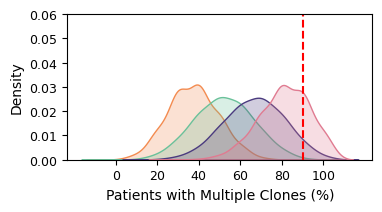

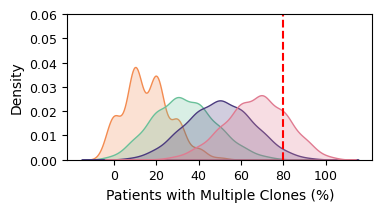

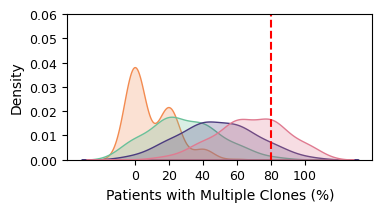

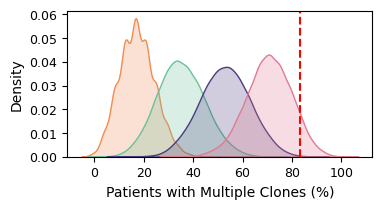

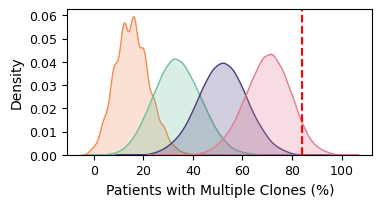

In [26]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


def calculate_inferential_stats(X):
    '''
    Description: Calculate the mean, standard deviation from a list
    param X: A random variable (vector/list)
    '''
    x_mean = np.mean(X)
    x_stdev = np.std(X)
    return (x_mean, x_stdev)

def calculate_z_score(x, mu, sigma):
    '''
    param x: The value of a random variable
    param mu: The mean of the random distribution
    param sigma: The standard deviation of the normal ditribution
    returns z: The standard score/z-score 
    '''
    z = (x-mu)/sigma
    return z

def perform_sim_stats(random_variable, x_mean, x_stdev):
    '''

    '''
    z_score = calculate_z_score(random_variable, x_mean, x_stdev)
    # One-tailed hypothesis
    p_value = 1 - norm.cdf(abs(z_score))
    return p_value

def compare_three_histograms(rate_1, rate_2, rate_3, rate_4, title_1, title_2, title_3, title_4, set_kde, kde_kws_opt, set_stat, set_bins, out_file):
    bin_range_opt = [0,110]
    bin_width_opt = 10
    # kde_kws_opt = 2
    plt.figure(figsize=(8, 4))
    sns.histplot(rate_1, bins=set_bins, color='#F38B50', kde=set_kde,kde_kws={'bw_adjust': kde_kws_opt}, stat=set_stat, binrange=bin_range_opt, binwidth=bin_width_opt)
    sns.histplot(rate_2, bins=set_bins, color='#6AC19A', kde=set_kde,kde_kws={'bw_adjust': kde_kws_opt}, stat=set_stat, binrange=bin_range_opt, binwidth=bin_width_opt)
    sns.histplot(rate_3, bins=set_bins, color='#4B3B7F', kde=set_kde,kde_kws={'bw_adjust': kde_kws_opt}, stat=set_stat, binrange=bin_range_opt, binwidth=bin_width_opt)
    sns.histplot(rate_4, bins=set_bins, color='#E07B91', kde=set_kde,kde_kws={'bw_adjust': kde_kws_opt}, stat=set_stat, binrange=bin_range_opt, binwidth=bin_width_opt)
    # sns.histplot(rate_1, bins=set_bins, color='#F38B50', label=title_1, kde=set_kde, stat=set_stat, binrange=bin_range_opt, binwidth=bin_width_opt)
    # sns.histplot(rate_2, bins=set_bins, color='#6AC19A', label=title_2, kde=set_kde, stat=set_stat, binrange=bin_range_opt, binwidth=bin_width_opt)
    # sns.histplot(rate_3, bins=set_bins, color='#4B3B7F', label=title_3, kde=set_kde, stat=set_stat, binrange=bin_range_opt, binwidth=bin_width_opt)
    # sns.histplot(rate_4, bins=set_bins, color='#E07B91', label=title_4, kde=set_kde, stat=set_stat, binrange=bin_range_opt, binwidth=bin_width_opt)

    # plt.legend(title="Translocation Rate")
    plt.xlabel('Patients with Multiple Clones (%)')
    plt.xticks(range(0, 110, 10))
    plt.yticks(range(0, 6000, 1000))
    plt.savefig(out_file, dpi=400, format='pdf')
    plt.show()



def compare_kde_plots(rate_1, rate_2, rate_3, rate_4, title_1, title_2, title_3, title_4, kde_kws_opt, baseline_value, out_file):
    width_in = 100 / 25.4
    height_in = 48 / 25.4
    title_font_size = 10
    tick_font_size = 9
    plt.figure(figsize=(width_in, height_in))
    sns.kdeplot(rate_1, bw_adjust=kde_kws_opt, color='#F38B50', label=title_1, fill=True)
    sns.kdeplot(rate_2, bw_adjust=kde_kws_opt, color='#6AC19A', label=title_2, fill=True)
    sns.kdeplot(rate_3, bw_adjust=kde_kws_opt, color='#4B3B7F', label=title_3, fill=True)
    sns.kdeplot(rate_4, bw_adjust=kde_kws_opt, color='#E07B91', label=title_4, fill=True)
    plt.axvline(x=baseline_value, color='red', linestyle='--', label=f'Actual 90%')
    # plt.legend(title="Translocation Rate")
    plt.xlabel('Patients with Multiple Clones (%)', fontsize=title_font_size)
    plt.ylabel('Density', fontsize=title_font_size)
    plt.xticks(range(0, 110, 20), fontsize=tick_font_size)
    plt.yticks([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06], fontsize=tick_font_size)
    plt.savefig(out_file, dpi=400, format='pdf', bbox_inches='tight')
    plt.show()



# Importing data
n_sim = 10_000
rate_0 = 0
rate_03 = 0.25
rate_05 = 0.5
rate_075 = 0.75

sim_dir = '../data/fig2_translocation_simulations'

raw_data_0 = f'simulation_{n_sim}_tl_rate_{rate_0}_raw_data.txt'
raw_data_03 = f'simulation_{n_sim}_tl_rate_{rate_03}_raw_data.txt'
raw_data_05 = f'simulation_{n_sim}_tl_rate_{rate_05}_raw_data.txt'
raw_data_075 = f'simulation_{n_sim}_tl_rate_{rate_075}_raw_data.txt'


df_0 = pd.read_csv(os.path.join(sim_dir, raw_data_0), sep='\t', header=0)
df_03 = pd.read_csv(os.path.join(sim_dir, raw_data_03), sep='\t', header=0)
df_05 = pd.read_csv(os.path.join(sim_dir, raw_data_05), sep='\t', header=0)
df_075 = pd.read_csv(os.path.join(sim_dir, raw_data_075), sep='\t', header=0)

title_1 = f'rate: {rate_0}'
title_2 = f'rate: {rate_03}'
title_3 = f'rate: {rate_05}'
title_4 = f'rate: {rate_075}'
set_kde = True
set_stat = 'count'
set_bins = 11

print([x for x in os.listdir(sim_dir) if x.startswith('')])

cardiac_rate_0 = df_0[f'Intensive_Care_Unit_III_Cardiac_Surgery|n_sim:{n_sim}|tl_rate:{rate_0}'].tolist()
cardiac_rate_03 = df_03[f'Intensive_Care_Unit_III_Cardiac_Surgery|n_sim:{n_sim}|tl_rate:{rate_03}'].tolist()
cardiac_rate_05 = df_05[f'Intensive_Care_Unit_III_Cardiac_Surgery|n_sim:{n_sim}|tl_rate:{rate_05}'].tolist()
cardiac_rate_075 = df_075[f'Intensive_Care_Unit_III_Cardiac_Surgery|n_sim:{n_sim}|tl_rate:{rate_075}'].tolist()

inpatient_rate_0 = df_0[f'Intensive_Care_Unit_I_Inpatients|n_sim:{n_sim}|tl_rate:{rate_0}'].tolist()
inpatient_rate_03 = df_03[f'Intensive_Care_Unit_I_Inpatients|n_sim:{n_sim}|tl_rate:{rate_03}'].tolist()
inpatient_rate_05 = df_05[f'Intensive_Care_Unit_I_Inpatients|n_sim:{n_sim}|tl_rate:{rate_05}'].tolist()
inpatient_rate_075 = df_075[f'Intensive_Care_Unit_I_Inpatients|n_sim:{n_sim}|tl_rate:{rate_075}'].tolist()

inf_d_rate_0 = df_0[f'Intensive_Care_Unit_c/o_Infectious_Diseases|n_sim:{n_sim}|tl_rate:{rate_0}'].tolist()
inf_d_rate_03 = df_03[f'Intensive_Care_Unit_c/o_Infectious_Diseases|n_sim:{n_sim}|tl_rate:{rate_03}'].tolist()
inf_d_rate_05 = df_05[f'Intensive_Care_Unit_c/o_Infectious_Diseases|n_sim:{n_sim}|tl_rate:{rate_05}'].tolist()
inf_d_rate_075 = df_075[f'Intensive_Care_Unit_c/o_Infectious_Diseases|n_sim:{n_sim}|tl_rate:{rate_075}'].tolist()

# merged_wards_rate_0 = df_0[f'ICU_cardiac/ICU_Inpatients/ICU_infectious_disease(merged)|n_sim:{n_sim}|tl_rate:{rate_0}'].tolist()
# merged_wards_rate_03 = df_03[f'ICU_cardiac/ICU_Inpatients/ICU_infectious_disease(merged)|n_sim:{n_sim}|tl_rate:{rate_03}'].tolist()
# merged_wards_rate_05 = df_05[f'ICU_cardiac/ICU_Inpatients/ICU_infectious_disease(merged)|n_sim:{n_sim}|tl_rate:{rate_05}'].tolist()
# merged_wards_rate_075 = df_075[f'ICU_cardiac/ICU_Inpatients/ICU_infectious_disease(merged)|n_sim:{n_sim}|tl_rate:{rate_075}'].tolist()

all_rate_0 = df_0[f'Every_ward|n_sim:{n_sim}|tl_rate:{rate_0}'].tolist()
all_rate_03 = df_03[f'Every_ward|n_sim:{n_sim}|tl_rate:{rate_03}'].tolist()
all_rate_05 = df_05[f'Every_ward|n_sim:{n_sim}|tl_rate:{rate_05}'].tolist()
all_rate_075 = df_075[f'Every_ward|n_sim:{n_sim}|tl_rate:{rate_075}'].tolist()



x_mean, x_stdev = calculate_inferential_stats(inf_d_rate_075)
p_value  = perform_sim_stats(80, x_mean, x_stdev)
print(p_value)

# sns.lineplot(x=range(len(data_sorted)), y=data_sorted)
# 'Every_ward|n_sim:10000|tl_rate:0'
# hist_data = np.histogram(data, bins=10)
# plt.figure(figsize=(8, 6))
# sns.lineplot(x=all_rate_0[1][:-1], y=all_rate_0[0])

compare_kde_plots(cardiac_rate_0, cardiac_rate_03, cardiac_rate_05, cardiac_rate_075, title_1, title_2, title_3, title_4, 2.5, 90, os.path.join(sim_dir, f'cardiac_{n_sim}_sim_histogram_no_legend.pdf'))
compare_kde_plots(inpatient_rate_0, inpatient_rate_03, inpatient_rate_05, inpatient_rate_075, title_1, title_2, title_3, title_4, 2.1, 80, os.path.join(sim_dir, f'inpatients_{n_sim}_sim_histogram_no_legend.pdf'))
compare_kde_plots(inf_d_rate_0, inf_d_rate_03, inf_d_rate_05, inf_d_rate_075, title_1, title_2, title_3, title_4, 3, 80, os.path.join(sim_dir, f'infectious_disease_{n_sim}_sim_histogram_no_legend.pdf'))
# compare_kde_plots(merged_wards_rate_0, merged_wards_rate_03, merged_wards_rate_05, merged_wards_rate_075, title_1, title_2, title_3, title_4, 1.6, 83.3, os.path.join(sim_dir, f'merged_wards_{n_sim}_sim_histogram_no_legend.pdf'))
compare_kde_plots(all_rate_0, all_rate_03, all_rate_05, all_rate_075, title_1, title_2, title_3, title_4, 1.6, 84, os.path.join(sim_dir, f'whole_dataset_{n_sim}_sim_histogram_no_legend.pdf'))

#### Normal (resp, nasal, rectal separate)
# compare_kde_plots(cardiac_rate_0, cardiac_rate_03, cardiac_rate_05, cardiac_rate_075, title_1, title_2, title_3, title_4, 2.5, 100, os.path.join(sim_dir, f'cardiac_{n_sim}_sim_histogram_no_legend.pdf'))
# compare_kde_plots(inpatient_rate_0, inpatient_rate_03, inpatient_rate_05, inpatient_rate_075, title_1, title_2, title_3, title_4, 1.9, 91.7, os.path.join(sim_dir, f'inpatients_{n_sim}_sim_histogram_no_legend.pdf'))
# compare_kde_plots(inf_d_rate_0, inf_d_rate_03, inf_d_rate_05, inf_d_rate_075, title_1, title_2, title_3, title_4, 2.5, 83.3, os.path.join(sim_dir, f'infectious_disease_{n_sim}_sim_histogram_no_legend.pdf'))
# compare_kde_plots(merged_wards_rate_0, merged_wards_rate_03, merged_wards_rate_05, merged_wards_rate_075, title_1, title_2, title_3, title_4, 1.4, 92.6, os.path.join(sim_dir, f'merged_wards_{n_sim}_sim_histogram_no_legend.pdf'))
# compare_kde_plots(all_rate_0, all_rate_03, all_rate_05, all_rate_075, title_1, title_2, title_3, title_4, 1.4, 92.9, os.path.join(sim_dir, f'whole_dataset_{n_sim}_sim_histogram_no_legend.pdf'))


# compare_three_histograms(cardiac_rate_0, cardiac_rate_03, cardiac_rate_05, cardiac_rate_075, title_1, title_2, title_3, title_4, set_kde, 2.5, set_stat, set_bins, os.path.join(sim_dir, f'cardiac_{n_sim}_sim_histogram_no_legend.pdf'))
# compare_three_histograms(inpatient_rate_0, inpatient_rate_03, inpatient_rate_05, inpatient_rate_075, title_1, title_2, title_3, title_4, set_kde, 2.5, set_stat, set_bins, os.path.join(sim_dir, f'inpatients_{n_sim}_sim_histogram_no_legend.pdf'))
# compare_three_histograms(inf_d_rate_0, inf_d_rate_03, inf_d_rate_05, inf_d_rate_075, title_1, title_2, title_3, title_4, set_kde, 2.5, set_stat, set_bins, os.path.join(sim_dir, f'infectious_disease_{n_sim}_sim_histogram_no_legend.pdf'))
# compare_three_histograms(merged_wards_rate_0, merged_wards_rate_03, merged_wards_rate_05, merged_wards_rate_075, title_1, title_2, title_3, title_4, set_kde, 1.5, set_stat, set_bins, os.path.join(sim_dir, f'merged_wards_{n_sim}_sim_histogram_no_legend.pdf'))
# compare_three_histograms(all_rate_0, all_rate_03, all_rate_05, all_rate_075, title_1, title_2, title_3, title_4, set_kde, 1.5, set_stat, set_bins, os.path.join(sim_dir, f'whole_dataset_{n_sim}_sim_histogram_no_legend.pdf'))

